In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

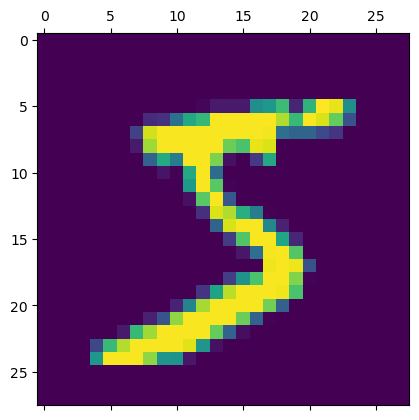

In [8]:
plt.matshow(X_train[0])

In [9]:
y_train[0]

5

In [10]:
X_train.shape

(60000, 28, 28)

In [27]:
X_train = X_train / 255
X_test = X_test / 255

In [28]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [29]:
X_train_flattened.shape

(60000, 784)

![alt text](/Users/hanifm/Workspace/deep-learning/digits_recognition/digits_nn.jpg)

In [30]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 309us/step - accuracy: 0.8161 - loss: 0.7166
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 294us/step - accuracy: 0.9150 - loss: 0.3061
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 294us/step - accuracy: 0.9216 - loss: 0.2837
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 294us/step - accuracy: 0.9232 - loss: 0.2741
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 300us/step - accuracy: 0.9256 - loss: 0.2642


In [31]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - accuracy: 0.9142 - loss: 0.3039


[0.268952876329422, 0.9247999787330627]

In [32]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step


array([2.2471057e-02, 3.4111414e-07, 9.4944030e-02, 9.5364368e-01,
       3.9496031e-03, 1.1229274e-01, 2.1022479e-06, 9.9986029e-01,
       1.1675199e-01, 7.3558521e-01], dtype=float32)

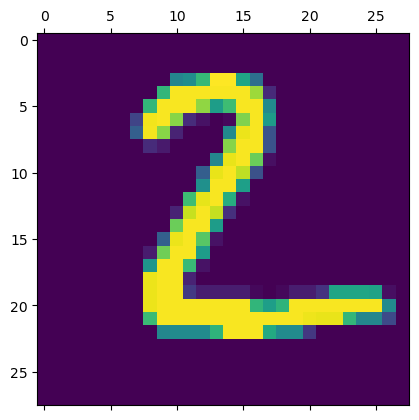

In [35]:
plt.matshow(X_test[1])

In [36]:
np.argmax(y_predicted[1])

2

In [45]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [46]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [47]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    5,    6,    3,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   8,   10,  913,   20,   12,    3,   13,   13,   37,    3],
       [   4,    0,   17,  920,    0,   24,    2,   12,   23,    8],
       [   1,    1,    2,    1,  921,    0,   12,    6,   10,   28],
       [  10,    3,    4,   28,   11,  777,   18,    9,   27,    5],
       [  10,    3,    5,    1,    8,   10,  918,    2,    1,    0],
       [   1,    6,   22,    5,    6,    0,    0,  965,    2,   21],
       [   7,   10,    5,   22,    9,   27,   10,   14,  865,    5],
       [  11,    7,    1,   10,   37,    8,    0,   41,    4,  890]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

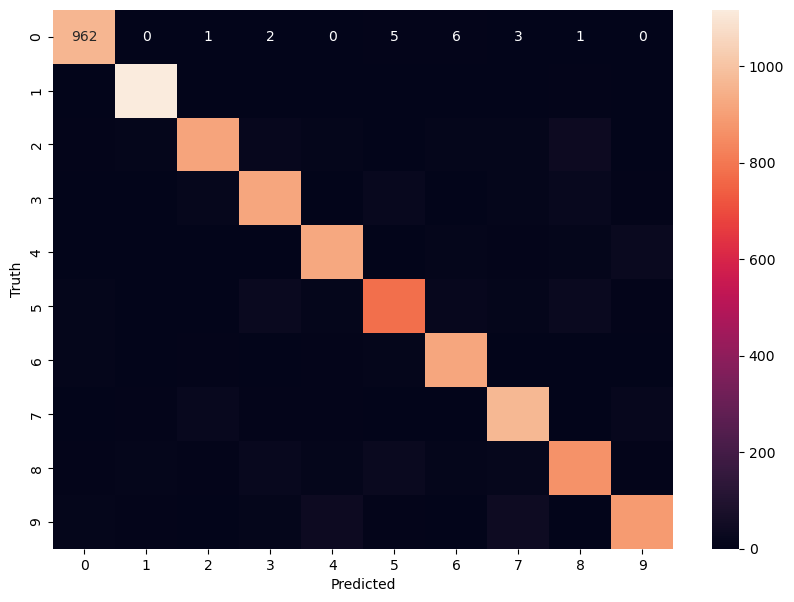

In [48]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Using Hidden Layer

In [49]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 867us/step - accuracy: 0.8675 - loss: 0.4597
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 858us/step - accuracy: 0.9643 - loss: 0.1281
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 895us/step - accuracy: 0.9733 - loss: 0.0897
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 827us/step - accuracy: 0.9786 - loss: 0.0671
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 789us/step - accuracy: 0.9850 - loss: 0.0481


In [50]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - accuracy: 0.9692 - loss: 0.1012


[0.08619137108325958, 0.9735999703407288]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step


Text(95.72222222222221, 0.5, 'Truth')

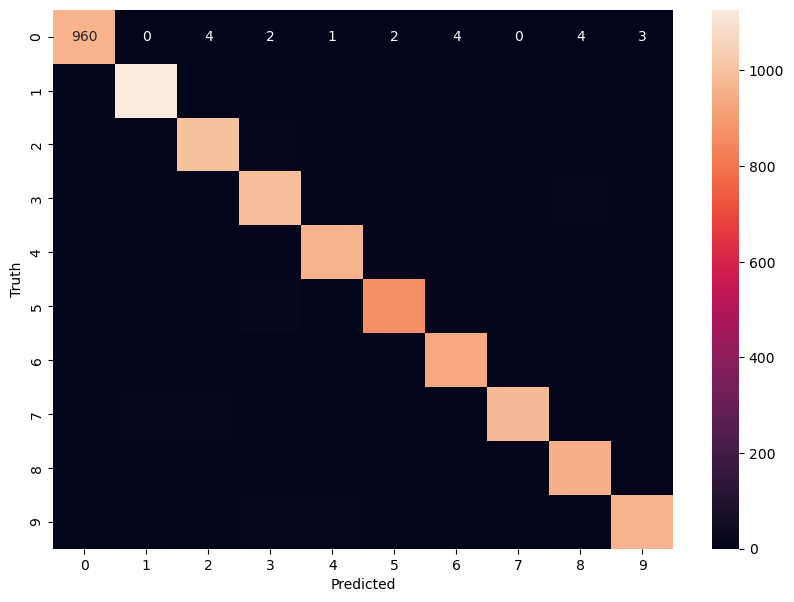

In [51]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Using Flatten layer so that we don't have to call .reshape on input dataset

In [52]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 813us/step - accuracy: 0.8731 - loss: 0.4537
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 769us/step - accuracy: 0.9614 - loss: 0.1333
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 778us/step - accuracy: 0.9731 - loss: 0.0908
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 826us/step - accuracy: 0.9802 - loss: 0.0669
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 885us/step - accuracy: 0.9841 - loss: 0.0515
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 881us/step - accuracy: 0.9882 - loss: 0.0394
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 803us/step - accuracy: 0.9900 - loss: 0.0335
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 786us/step - accuracy: 0.9921 - loss: 0.0270
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 767us/step - accuracy: 0.9939 - loss: 0.0213
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 789us/step - accuracy: 0.9946 - loss: 0.0179


In [53]:

model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.9732 - loss: 0.1001


[0.0802888497710228, 0.9781000018119812]